# LAB D: Optimization problems and QAOA

## Introduction

Many problems in quantitative fields such as finance and engineering are optimization problems. Optimization problems lie at the core of complex decision-making and definition of strategies.

Optimization (or combinatorial optimization) means searching for an optimal solution in a finite or countably infinite set of potential solutions. Optimality is defined with respect to some criterion function, which is to be minimized or maximized. This is typically called cost function or objective function.

**Typical optimization problems**

Minimization: cost, distance, length of a traversal, weight, processing time, material, energy consumption, number of objects

Maximization: profit, value, output, return, yield, utility, efficiency, capacity, number of objects

We consider here max-cut problems of practical interest in many fields, and show how they can be mapped on quantum computers manually and how Qiskit optimization module supports this.


## Weighted Max-Cut

Max-Cut is an NP-complete problem, with applications in clustering, network science, and statistical physics. To grasp how practical applications are mapped into given Max-Cut instances, consider a system of many people that can interact and influence each other. Individuals can be represented by vertices of a graph, and their interactions seen as pairwise connections between vertices of the graph, or edges. With this representation in mind, it is easy to model typical marketing problems. For example, suppose that it is assumed that individuals will influence each other's buying decisions, and knowledge is given about how strong they will influence each other. The influence can be modeled by weights assigned on each edge of the graph. It is possible then to predict the outcome of a marketing strategy in which products are offered for free to some individuals, and then ask which is the optimal subset of individuals that should get the free products, in order to maximize revenues.

The formal definition of this problem is the following:

Consider an $n$-node undirected graph *G = (V, E)* where *|V| = n* with edge weights $w_{ij}>0$, $w_{ij}=w_{ji}$, for $(i, j)\in E$. A cut is defined as a partition of the original set V into two subsets. The cost function to be optimized is in this case the sum of weights of edges connecting points in the two different subsets, *crossing* the cut. By assigning $x_i=0$ or $x_i=1$ to each node $i$, one tries to maximize the global profit function (here and in the following summations run over indices 0,1,...n-1)

$$C(\textbf{x}) = \sum_{i \in V}\sum_{j \in V} w_{ij} x_i (1-x_j)$$

In our simple marketing model, $w_{ij}$ represents the probability that the person $j$ will buy a product after $i$ gets a free one. Note that the weights $w_{ij}$ can in principle be greater than $1$ (or even negative), corresponding to the case where the individual $j$ will buy more than one product. Maximizing the total buying probability corresponds to maximizing the total future revenues. In the case where the profit probability will be greater than the cost of the initial free samples, the strategy is a convenient one. An extension to this model has the nodes themselves carry weights, which can be regarded, in our marketing model, as the likelihood that a person granted with a free sample of the product will buy it again in the future, but for the moment let's stick with the simpler case. The objective function to maximize becomes:

$$C(\textbf{x}) = \sum_{i \in V}\sum_{j \in V} w_{ij} x_i (1-x_j)$$

In order to find a solution to this problem on a quantum computer, one needs first to map it to an Ising Hamiltonian. This can be done with the assignment $x_i\rightarrow (1-Z_i)/2$, where $Z_i$ is the Pauli Z operator that has eigenvalues $\pm 1$. Doing this we find that

$$C(\textbf{Z}) = \sum_{i,j} \frac{w_{ij}}{4} (1-Z_i)(1+Z_j) = -\frac{1}{2} \sum_{i<j} w_{ij} Z_i Z_j +\mathrm{const},$$

where $\mathrm{const} = \sum_{i<j}w_{ij}/2$, which can be ignored for max/min problems. In other terms, the weighted Max-Cut problem is equivalent to minimizing the Ising Hamiltonian

$$ H = \sum_{i<j} w_{ij} Z_iZ_j.$$

## Quantum Approximate Optimization Algorithm (QAOA)

The Quantum Approximate Optimization Algorithm (QAOA) is a hybrid quantum-classical algorithm designed to solve combinatorial optimization problems. It operates by encoding the problem into a cost Hamiltonian $H_P$, whose ground state represents the optimal solution. QAOA alternates between applying problem-specific and mixing Hamiltonians $H_M$, parameterized by angles, to evolve an initial quantum state toward a solution. These angles are optimized using a classical optimizer to maximize the probability of measuring a state corresponding to the best solution. QAOA is particularly well-suited for problems like Max-Cut, MIS, and others, offering a balance between quantum capabilities and classical optimization.

**Problem Input:**

1.	Objective Function:
An optimization problem is expressed as a cost function  $C(z)$ , where  $z \in \{0, 1\}^n$  represents the binary decision variables.

2.	Problem Hamiltonian:
The cost function is mapped to a diagonal Hamiltonian  $H_C$  in the computational basis:

$$H_P |z\rangle = C(z) |z\rangle, \quad \forall z \in \{0, 1\}^n.$$

3.	Mixing Hamiltonian:
A “mixing” Hamiltonian  $H_M$  is chosen to encourage exploration of the solution space. Typically:

$$H_M = \sum_{i=1}^n X_i,$$

where  $X_i$  is the Pauli-X operator applied to qubit  $i$ .

**Algorithm Parameters:**

1.	Initial State:
The algorithm begins with an easily prepared quantum state, usually the equal superposition:

$$|\psi_0\rangle = \frac{1}{\sqrt{2^n}} \sum_{z \in \{0, 1\}^n} |z\rangle.$$

2.	Parameter Angles:
Two sets of  $p$ -dimensional parameters are introduced:

$$\boldsymbol{\gamma} = (\gamma_1, \gamma_2, \ldots, \gamma_p), \quad \boldsymbol{\beta} = (\beta_1, \beta_2, \ldots, \beta_p).$$


**Quantum Circuit:**

The algorithm alternates between applying the cost Hamiltonian and mixer Hamiltonian over  $p$  layers, creating the parameterized state:

$$|\psi(\boldsymbol{\gamma}, \boldsymbol{\beta})\rangle = \prod_{k=1}^p \left( e^{-i \gamma_k H_P} e^{-i \beta_k H_M} \right) |\psi_0\rangle.$$


**Classical Optimization:**

The parameters  $\boldsymbol{\gamma}$  and  $\boldsymbol{\beta}$  are optimized using a classical algorithm to maximize the expected value of the problem Hamiltonian:

$$F(\boldsymbol{\gamma}, \boldsymbol{\beta}) = \langle \psi(\boldsymbol{\gamma}, \boldsymbol{\beta}) | H_P | \psi(\boldsymbol{\gamma}, \boldsymbol{\beta}) \rangle.$$

After optimization, the state  $|\psi(\boldsymbol{\gamma}^f, \boldsymbol{\beta}^f)\rangle$ is measured in the computational basis, yielding a candidate solution $z$. Repeated measurements yield samples that approximate the optimal solution.

*References:*

- \ A. Lucas, Frontiers in Physics 2, 5 (2014)
- \ E. Farhi, J. Goldstone, S. Gutmann, e-print arXiv 1411.4028 (2014)
- \ D. Wecker, M. B. Hastings, M. Troyer, Phys. Rev. A 94, 022309 (2016)
- \ E. Farhi, J. Goldstone, S. Gutmann, H. Neven, e-print arXiv 1703.06199 (2017)

# WEIGHTED MAX-CUT PROBLEM WITH QISKIT

Given an arbitary weighted undirected graph, implement the circuit that solves the corresponding Max-Cut problem on gate-based quantum machines.
### Installing necessary packages
Let's start by installing the necessary qiskit libraries into your environment and import them. Run the cells below to complete these installations.

In [2]:
%pip install uv --quiet
!uv pip install "iqm-client[qiskit]==29.12" qiskit-algorithms==0.3.1  pylatexenc --quiet
!uv pip install matplotlib --quiet
!uv pip install lagrangeclient --index-url https://gitlab.linksfoundation.com/api/v4/projects/1709/packages/pypi/simple
!uv pip install networkx
#!uv pip install qiskit-aer

Note: you may need to restart the kernel to use updated packages.
Using Python 3.11.13 environment at: /Users/pvi/develop/opt/mambaforge/envs/iqm
Audited 1 package in 5ms
Using Python 3.11.13 environment at: /Users/pvi/develop/opt/mambaforge/envs/iqm
Resolved 1 package in 446ms                                          
⠙ Preparing packages... (0/1)                                                   
⠙ Preparing packages... (0/1)-------------------     0 B/1.94 MiB            
⠙ Preparing packages... (0/1)------------------- 14.88 KiB/1.94 MiB          
⠙ Preparing packages... (0/1)------------------- 30.88 KiB/1.94 MiB          
⠙ Preparing packages... (0/1)------------------- 46.88 KiB/1.94 MiB          
⠙ Preparing packages... (0/1)------------------- 62.88 KiB/1.94 MiB          
⠙ Preparing packages... (0/1)------------------- 78.31 KiB/1.94 MiB          
⠙ Preparing packages... (0/1)------------------- 94.31 KiB/1.94 MiB          
⠙ Preparing packages... (0/1)------------------- 110

In [17]:
import networkx as nx
import matplotlib.pyplot as plt
import random
random.seed(42)
from qiskit.circuit import Parameter
from scipy.optimize import minimize
from qiskit.visualization import plot_histogram
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
import networkx as nx
from qiskit import transpile

### Creating a weighted graph
As a first action, randomly generate a weighted graph using networkx. For now, let's stick with the defined parameters (number of nodes, connectivity, random seed and weight range). Run the following cell which will also print the created graph.

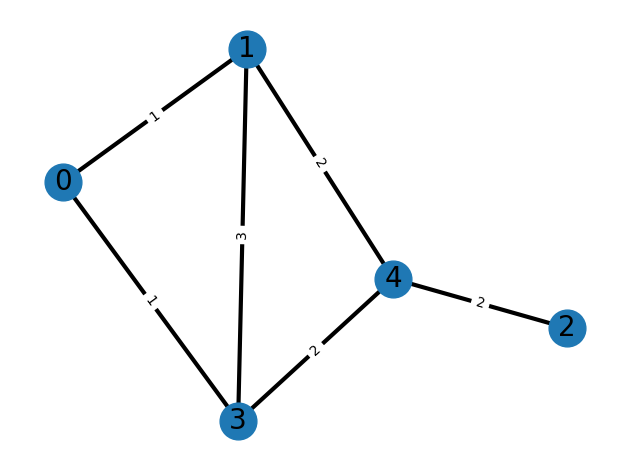

In [8]:
n = 5
graph = nx.gnp_random_graph(n, p=0.5, seed=3)
for (u,v,w) in graph.edges(data=True):
    w['weight'] = random.randint(1,5)
pos = nx.spring_layout(graph, seed=7)  # positions for all nodes - seed for reproducibility

# nodes
nx.draw_networkx_nodes(graph, pos, node_size=700)
# edges
nx.draw_networkx_edges(graph, pos, width=3)
# node labels
nx.draw_networkx_labels(graph, pos, font_size=20, font_family="sans-serif")
# edge weight labels
edge_labels = nx.get_edge_attributes(graph, "weight")
nx.draw_networkx_edge_labels(graph, pos, edge_labels)

ax = plt.gca()
plt.axis("off")
plt.tight_layout()
plt.show()

adjacency = nx.adjacency_matrix(graph).todense()

# Exercise 1: QAOA for the weighted max-cut
Solve the weighted max-cut problem with the QAOA for the previously generated graph (using Qiskit)

## Exercise 1.1: QAOA for the weighted max-cut: circuit

Create the (parameterized) circuits for each QAOA Hamiltonians:
- mixing Hamiltonian
- problem Hamiltonian
- state preparation

Finally construct and print the full circuit

In [9]:
# mixing Hamiltonian
beta = Parameter("beta")
qc_mix = QuantumCircuit(n)
for i in range(n):
    qc_mix.rx(beta, i)

In [10]:
# problem Hamiltonian
gamma = Parameter("gamma")
qc_p = QuantumCircuit(n)
for pair in list(graph.edges()):  # pairs of nodes
    qc_p.rzz(gamma, pair[0], pair[1])

In [11]:
# state initialization
qc_0 = QuantumCircuit(n)
for i in range(n):
    qc_0.h(i)

In [12]:
qc_qaoa = QuantumCircuit(n)
qc_qaoa.append(qc_0, range(n))
qc_qaoa.append(qc_p, range(n))
qc_qaoa.append(qc_mix, range(n))
qc_qaoa.decompose().decompose().draw()

┌─────────┐                                              ┌───────────┐»
q_0: ┤ U2(0,π) ├──■─────────────────■────■─────────────────■──┤ R(beta,0) ├»
     ├─────────┤┌─┴─┐┌───────────┐┌─┴─┐  │                 │  └───────────┘»
q_1: ┤ U2(0,π) ├┤ X ├┤ Rz(gamma) ├┤ X ├──┼─────────────────┼────────■──────»
     ├─────────┤└───┘└───────────┘└───┘  │                 │        │      »
q_2: ┤ U2(0,π) ├─────────────────────────┼─────────────────┼────────┼──────»
     ├─────────┤                       ┌─┴─┐┌───────────┐┌─┴─┐    ┌─┴─┐    »
q_3: ┤ U2(0,π) ├───────────────────────┤ X ├┤ Rz(gamma) ├┤ X ├────┤ X ├────»
     ├─────────┤                       └───┘└───────────┘└───┘    └───┘    »
q_4: ┤ U2(0,π) ├───────────────────────────────────────────────────────────»
     └─────────┘                                                           »
«                                                                             »
«q_0: ────────────────────────────────────────────────────────────────────────»
«                                              ┌───────────┐                  »
«q_1: ───────────────■────■─────────────────■──┤ R(beta,0) ├──────────────────»
«                    │    │                 │  └───────────┘                  »
«q_2: ───────────────┼────┼─────────────────┼────────■─────────────────────■──»
«     ┌───────────┐┌─┴─┐  │                 │        │                     │  »
«q_3: ┤ Rz(gamma) ├┤ X ├──┼─────────────────┼────────┼─────────────────────┼──»
«     └───────────┘└───┘┌─┴─┐┌───────────┐┌─┴─┐    ┌─┴─┐    ┌───────────┐┌─┴─┐»
«q_4: ──────────────────┤ X ├┤ Rz(gamma) ├┤ X ├────┤ X ├────┤ Rz(gamma) ├┤ X ├»
«                       └───┘└───────────┘└───┘    └───┘    └───────────┘└───┘»
«                                                 
«q_0: ────────────────────────────────────────────
«                                                 
«q_1: ────────────────────────────────────────────
«     ┌───────────┐                               
«q_2: ┤ R(beta,0) ├───────────────────────────────
«     └───────────┘                  ┌───────────┐
«q_3: ──────■─────────────────────■──┤ R(beta,0) ├
«         ┌─┴─┐    ┌───────────┐┌─┴─┐├───────────┤
«q_4: ────┤ X ├────┤ Rz(gamma) ├┤ X ├┤ R(beta,0) ├
«         └───┘    └───────────┘└───┘└───────────┘

## Exercise 1.2: QAOA for the weighted max-cut: functions

Define functions for the following objectives:
- cost/objective function
- compute expectation
- create the QAOA circuit
- simulate the circuit and compute the relative expectation value

In [18]:
!lagrangeclient

== DEVICE LOGIN FLOW ==
🔗 Visit this URL in your browser:
https://spark.quantum.linksfoundation.com/auth/realms/cortex/device?user_code=KTYH-FPXX
Waiting for user to complete login...
=========== TOKEN ===========
eyJhbGciOiJSUzI1NiIsInR5cCIgOiAiSldUIiwia2lkIiA6ICJPN2g5cUtOOGRsdi1OZlo3Qm10NEJNZC0yaUFnMWt5STFEa2h0R3M5OU5rIn0.eyJleHAiOjE3NjQwMDA3MDgsImlhdCI6MTc2MzM5NTkwOCwiYXV0aF90aW1lIjoxNzYzMzk0NzcxLCJqdGkiOiJvbnJ0ZGc6NzRiNzgwMGMtYzNkNS00ODQyLTEzZDEtNWFhMmM3Yzk1NDQ1IiwiaXNzIjoiaHR0cHM6Ly9zcGFyay5xdWFudHVtLmxpbmtzZm91bmRhdGlvbi5jb20vYXV0aC9yZWFsbXMvY29ydGV4IiwiYXVkIjoiYWNjb3VudCIsInN1YiI6IjM4OTEyZGJmLTRjZjEtNDgwYy04NDkwLTM3NzU0NDcwMDEwOSIsInR5cCI6IkJlYXJlciIsImF6cCI6ImlxbV9jbGllbnQiLCJzaWQiOiIzZGNiMDc1Ni1hZTMxLTRhNzMtOTUzYS0zNjBkZWIxMmNjZGEiLCJhY3IiOiIwIiwiYWxsb3dlZC1vcmlnaW5zIjpbImh0dHBzOi8vc3BhcmsucXVhbnR1bS5saW5rc2ZvdW5kYXRpb24uY29tLyoiLCJodHRwczovL2lxbXNwYXJrLnBvbGl0by5pdC8iXSwicmVhbG1fYWNjZXNzIjp7InJvbGVzIjpbImV4YV9hZG1pbiIsIm9mZmxpbmVfYWNjZXNzIiwicGxhdGZvcm0tYWRtaW4iLCJjb3J0ZXhfYW

In [19]:
from iqm.qiskit_iqm import IQMProvider
import os

def maxcut_obj(solution, graph):
    """Given a bit string as a solution, this function returns
    the number of edges shared between the two partitions
    of the graph.
    Args:
        solution: (str) solution bit string
        graph: networkx graph
    Returns:
        obj: (float) Objective
    """
    obj = 0
    for i, j in graph.edges():
        if solution[i] != solution[j]:
            w = graph.edges[i,j]['weight']
            obj -= w
    return obj


def compute_expectation(counts, graph):
    """Computes expectation value based on measurement results
    Args:
        counts: (dict) key as bit string, val as count
        graph: networkx graph
    Returns:
        avg: float
             expectation value
    """
    avg = 0
    sum_count = 0
    for bit_string, count in counts.items():
        obj = maxcut_obj(bit_string, graph)
        avg += obj * count
        sum_count += count
    return avg/sum_count


# We will also bring the different circuit components that
# build the qaoa circuit under a single function
def create_qaoa_circ(graph, theta):
    """Creates a parametrized qaoa circuit
    Args:
        graph: networkx graph
        theta: (list) unitary parameters: first half for gamma, second for beta
    Returns:
        (QuantumCircuit) qiskit circuit
    """
    nqubits = len(graph.nodes())
    n_layers = len(theta)//2  # number of alternating unitaries
    beta = theta[:n_layers]
    gamma = theta[n_layers:]

    qc = QuantumCircuit(nqubits)

    # initial_state
    qc.h(range(nqubits))

    for layer_index in range(n_layers):
        # problem unitary
        for pair in list(graph.edges()):
            qc.rzz(gamma[layer_index], pair[0], pair[1])
        # mixer unitary
        for qubit in range(nqubits):
            qc.rx(beta[layer_index], qubit)

    qc.measure_all()
    return qc


# Finally we write a function that executes the circuit
# on the chosen backend
def get_expectation(graph, shots=512):
    """Runs parametrized circuit
    Args:
        graph: networkx graph
    """
    def execute_circ(theta):
        """creates the parameterized circuit
        Args:
            theta: (list) unitary parameters: first half for gamma, second for beta
        Returns:
            expectation value: float
        """
        qc = create_qaoa_circ(graph, theta)
        counts = AerSimulator().run(qc, seed_simulator=10,
                             nshots=shots).result().get_counts()
        return compute_expectation(counts, graph)

    return execute_circ

# on the chosen backend
def get_lagrange_expectation(graph, shots=512):
    """Runs parametrized circuit
    Args:
        graph: networkx graph
    """

    os.environ["IQM_TOKENS_FILE"] = "./tokens.json"
    provider = IQMProvider(url="https://spark.quantum.linksfoundation.com/station")
    lagrange = provider.get_backend()

    def execute_circ(theta):
        """creates the parameterized circuit
        Args:
            theta: (list) unitary parameters: first half for gamma, second for beta
        Returns:
            expectation value: float
        """
        qc = create_qaoa_circ(graph, theta)
        transpiled_qc = transpile(qc, lagrange)
        counts = lagrange.run(transpiled_qc,
                             shots=shots).result().get_counts()
        return compute_expectation(counts, graph)

    return execute_circ

## Exercise 1.3: QAOA for the weighted max-cut: minimization

execute the minimization routine using scipy's $\textit{minimize}$ function (see previous import) with $\underline{two}$ parameters ($\underline{one}$ QAOA layer), initialized at $0$, and the $\textit{Powell}$ method

In [14]:
expectation = get_expectation(graph)
res = minimize(expectation,
               x0=[0,0],
               method='Powell')
res

 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: -5.529296875
       x: [ 0.000e+00  0.000e+00]
     nit: 1
   direc: [[ 1.000e+00  0.000e+00]
           [ 0.000e+00  1.000e+00]]
    nfev: 7

In [ ]:
lagrange_expectation = get_lagrange_expectation(graph)
res = minimize(lagrange_expectation,
               x0=[0,0],
               method='Powell', options={'disp': True, 'maxiter': 50})
res

station-control-client version '9.17.0' is newer minor version than '9.4.0' used by the station control server, some new client features might not be supported.


## Exercise 1.4: QAOA for the weighted max-cut: results

execute the QAOA circuit one last time using the optimized parameter set found by the scipy minimizer in order to retrieve the most frequent solutions bitstrings (i.e., the solution of the initial max-cut problem)

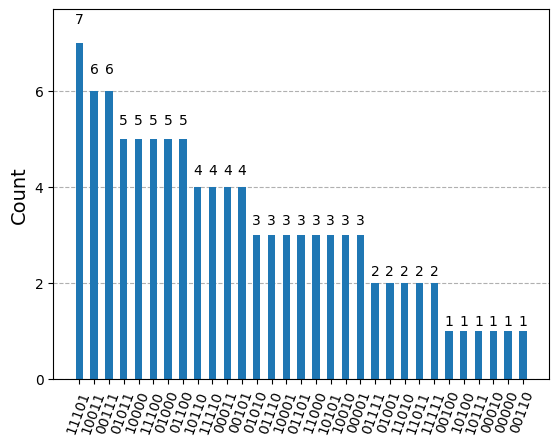

In [10]:
qc_res = create_qaoa_circ(graph, res.x)
counts = AerSimulator().run(qc_res, seed_simulator=10, shots=100).result().get_counts()
plot_histogram(counts, sort='value_desc')

In [11]:
#print the results (nodes in the cut, a.k.a qubits = 1) with relative cost function
for sol in sorted(counts, key=counts.get, reverse=True):
    vertexes = [idx for idx, item in enumerate(sol) if '1' in item]
    print(f'Vertexes: {vertexes} --- Cut: { maxcut_obj(sol, graph)}')

Vertexes: [0, 1, 2, 4] --- Cut: -6
Vertexes: [2, 3, 4] --- Cut: -6
Vertexes: [0, 3, 4] --- Cut: -8
Vertexes: [1, 2] --- Cut: -8
Vertexes: [1] --- Cut: -6
Vertexes: [0, 1, 2] --- Cut: -8
Vertexes: [0] --- Cut: -2
Vertexes: [1, 3, 4] --- Cut: -4
Vertexes: [2, 4] --- Cut: -4
Vertexes: [3, 4] --- Cut: -8
Vertexes: [0, 1, 2, 3] --- Cut: -6
Vertexes: [0, 2, 3] --- Cut: -8
Vertexes: [4] --- Cut: -6
Vertexes: [0, 3] --- Cut: -6
Vertexes: [0, 2, 4] --- Cut: -6
Vertexes: [0, 1] --- Cut: -6
Vertexes: [1, 2, 4] --- Cut: -6
Vertexes: [0, 4] --- Cut: -8
Vertexes: [1, 2, 3] --- Cut: -8
Vertexes: [1, 3] --- Cut: -6
Vertexes: [0, 1, 2, 3, 4] --- Cut: 0
Vertexes: [0, 1, 3, 4] --- Cut: -2
Vertexes: [0, 1, 3] --- Cut: -4
Vertexes: [1, 4] --- Cut: -8
Vertexes: [1, 2, 3, 4] --- Cut: -2
Vertexes: [2, 3] --- Cut: -8
Vertexes: [] --- Cut: 0
Vertexes: [3] --- Cut: -6
Vertexes: [0, 2, 3, 4] --- Cut: -6
Vertexes: [0, 2] --- Cut: -4
Vertexes: [2] --- Cut: -2


## Exercise 1.5 (optional): QAOA for the weighted max-cut: experiment!

Experiment by changing:
- initial graph by adding nodes (remember that the number of nodes is equal to the qubit number, if you increase the size too much you could exceed the memory or get the emulation time), changing the connectivity ($p$) and the random seed;
- increase the number of QAOA layers (as above, remember that if you overdo the classical optimizer could get too slow and/or give wrong results);
- change the minimization settings (optimization method, initial values of the QAOA parameters $[\gamma^0, \beta^0]$). For example, try to initialize the QAOA parameters to the set found by the optimizer in your previous attemp $[\gamma^0, \beta^0] = [\gamma ^f, \beta ^f]$.

What happens?

# Maximum Independent Set (MIS)


The Maximum Independent Set (MIS) problem seeks the largest subset of vertices in a graph such that no two are adjacent. Given a graph  *G = (V, E)* , an independent set is a subset  $S \subseteq V$  where no edge exists between any pair of vertices in  $S$ . The problem is NP-hard, with applications in wireless networks, scheduling, social networks and computational biology. While exact solutions are computationally expensive, approximation algorithms and heuristics are often used. Special graph types allow more efficient solutions, but, for the general case, quantum computing offers promising approaches.

Using binary variables, the cost function of the MIS problem can be formulated as:

$$\tilde{C}(\textbf{x}) = - \sum_{i \in V} x_i +2\sum_{(i,j) \in E} x_i x_j$$

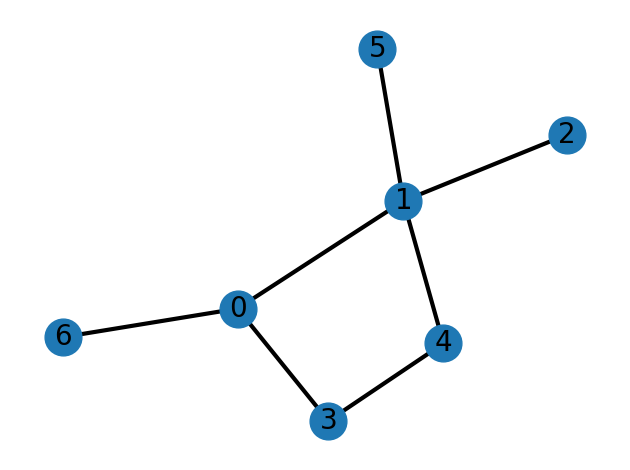

In [12]:
n = 7
graph = nx.gnp_random_graph(n, p=0.4, seed=3)
pos = nx.spring_layout(graph, seed=7)  # positions for all nodes - seed for reproducibility

# nodes
nx.draw_networkx_nodes(graph, pos, node_size=700)
# edges
nx.draw_networkx_edges(graph, pos, width=3)
# node labels
nx.draw_networkx_labels(graph, pos, font_size=20, font_family="sans-serif")

ax = plt.gca()
plt.axis("off")
plt.tight_layout()
plt.show()

adjacency = nx.adjacency_matrix(graph).todense()

# Exercise 2: QAOA for the MIS problem
Solve the Maximum Independent Set (MIS) problem with the QAOA for the previously generated graph (using Qiskit)

## Exercise 2.0: QAOA for the MIS problem: formulation
Compute (by hand) the Ising version of the cost function of the MIS problem

## Exercise 2.1: QAOA for the MIS problem: circuit

Create the (parameterized) circuits for each QAOA Hamiltonians:
- mixing Hamiltonian
- problem Hamiltonian
- state preparation

Finally construct and print the full circuit

In [13]:
# mixing Hamiltonian
beta = Parameter("beta")
qc_mix = QuantumCircuit(n)
for i in range(n):
    qc_mix.rx(beta, i)
# problem Hamiltonian
gamma = Parameter("gamma")
qc_p = QuantumCircuit(n)
for pair in list(graph.edges()):  # pairs of nodes
    qc_p.rzz(gamma, pair[0], pair[1])
    qc_p.rz(-gamma*2, pair[0])
    qc_p.rz(-gamma*2, pair[1])
# state initialization
qc_0 = QuantumCircuit(n)
for i in range(n):
    qc_0.h(i)
qc_qaoa = QuantumCircuit(n)
qc_qaoa.append(qc_0, range(n))
qc_qaoa.append(qc_p, range(n))
qc_qaoa.append(qc_mix, range(n))
qc_qaoa.decompose().decompose().draw()

global phase: 14*gamma
     ┌─────────┐                       ┌──────────────┐                       »
q_0: ┤ U2(0,π) ├──■─────────────────■──┤ U1(-2*gamma) ├───────■───────────────»
     ├─────────┤┌─┴─┐┌───────────┐┌─┴─┐├──────────────┤       │               »
q_1: ┤ U2(0,π) ├┤ X ├┤ Rz(gamma) ├┤ X ├┤ U1(-2*gamma) ├──■────┼───────────────»
     ├─────────┤└───┘└───────────┘└───┘└──────────────┘┌─┴─┐  │  ┌───────────┐»
q_2: ┤ U2(0,π) ├───────────────────────────────────────┤ X ├──┼──┤ Rz(gamma) ├»
     ├─────────┤                                       └───┘┌─┴─┐├───────────┤»
q_3: ┤ U2(0,π) ├────────────────────────────────────────────┤ X ├┤ Rz(gamma) ├»
     ├─────────┤                                            └───┘└───────────┘»
q_4: ┤ U2(0,π) ├──────────────────────────────────────────────────────────────»
     ├─────────┤                                                              »
q_5: ┤ U2(0,π) ├──────────────────────────────────────────────────────────────»
     ├─────────┤                                                              »
q_6: ┤ U2(0,π) ├──────────────────────────────────────────────────────────────»
     └─────────┘                                                              »
«               ┌──────────────┐                                              »
«q_0: ───────■──┤ U1(-2*gamma) ├────────────────────■──────────────────────■──»
«            │  ├──────────────┤                    │                      │  »
«q_1: ──■────┼──┤ U1(-2*gamma) ├───────────────■────┼─────────────────■────┼──»
«     ┌─┴─┐  │  ├──────────────┤┌───────────┐  │    │                 │    │  »
«q_2: ┤ X ├──┼──┤ U1(-2*gamma) ├┤ R(beta,0) ├──┼────┼─────────────────┼────┼──»
«     └───┘┌─┴─┐├──────────────┤└───────────┘  │    │                 │    │  »
«q_3: ─────┤ X ├┤ U1(-2*gamma) ├───────────────┼────┼─────────────────┼────┼──»
«          └───┘└──────────────┘             ┌─┴─┐  │  ┌───────────┐┌─┴─┐  │  »
«q_4: ───────────────────────────────────────┤ X ├──┼──┤ Rz(gamma) ├┤ X ├──┼──»
«                                            └───┘  │  └───────────┘└───┘  │  »
«q_5: ──────────────────────────────────────────────┼──────────────────────┼──»
«                                                 ┌─┴─┐┌───────────┐     ┌─┴─┐»
«q_6: ────────────────────────────────────────────┤ X ├┤ Rz(gamma) ├─────┤ X ├»
«                                                 └───┘└───────────┘     └───┘»
«     ┌──────────────┐┌───────────┐                                            »
«q_0: ┤ U1(-2*gamma) ├┤ R(beta,0) ├────────────────────────────────────────────»
«     ├──────────────┤└───────────┘                            ┌──────────────┐»
«q_1: ┤ U1(-2*gamma) ├───────────────■──────────────────────■──┤ U1(-2*gamma) ├»
«     └──────────────┘               │                      │  └──────────────┘»
«q_2: ───────────────────────────────┼──────────────────────┼──────────────────»
«                                    │                      │  ┌──────────────┐»
«q_3: ──────────────────────■────────┼─────────────────■────┼──┤ U1(-2*gamma) ├»
«     ┌──────────────┐    ┌─┴─┐      │  ┌───────────┐┌─┴─┐  │  ├──────────────┤»
«q_4: ┤ U1(-2*gamma) ├────┤ X ├──────┼──┤ Rz(gamma) ├┤ X ├──┼──┤ U1(-2*gamma) ├»
«     └──────────────┘    └───┘    ┌─┴─┐├───────────┤└───┘┌─┴─┐├──────────────┤»
«q_5: ─────────────────────────────┤ X ├┤ Rz(gamma) ├─────┤ X ├┤ U1(-2*gamma) ├»
«     ┌──────────────┐┌───────────┐└───┘└───────────┘     └───┘└──────────────┘»
«q_6: ┤ U1(-2*gamma) ├┤ R(beta,0) ├────────────────────────────────────────────»
«     └──────────────┘└───────────┘                                            »
«                  
«q_0: ─────────────
«     ┌───────────┐
«q_1: ┤ R(beta,0) ├
«     └───────────┘
«q_2: ─────────────
«     ┌───────────┐
«q_3: ┤ R(beta,0) ├
«     ├───────────┤
«q_4: ┤ R(beta,0) ├
«     ├───────────┤
«q_5: ┤ R(beta,0) ├
«     └───────────┘
«q_6: ─────────────
«

## Exercise 2.2: QAOA for the MIS problem: functions

Define functions for the following objectives:
- cost/objective function
- compute expectation
- create the QAOA circuit
- simulate the circuit and compute the relative expectation value

In [14]:
def mis_obj(solution, graph):
    """Given a bit string as a solution, this function returns
    the number of edges shared between the two partitions
    of the graph.
    Args:
        solution: (str) solution bit string
        graph: networkx graph
    Returns:
        obj: (float) Objective
    """
    obj = 0
    for i, j in graph.edges():
        w = (1 - 2*float(solution[i]))*(1 - 2*float(solution[j])) - (1 - 2*float(solution[i])) - (1 - 2*float(solution[j]))
        #obj += 1/2*w
        obj += w
    for i in graph.nodes():
        obj += (1 - 2*float(solution[i]))
    return obj

def compute_expectation_mis(counts, graph):
    """Computes expectation value based on measurement results
    Args:
        counts: (dict) key as bit string, val as count
        graph: networkx graph
    Returns:
        avg: float
             expectation value
    """
    avg = 0
    sum_count = 0
    for bit_string, count in counts.items():
        obj = mis_obj(bit_string, graph)
        avg += obj * count
        sum_count += count
    return avg/sum_count

# We will also bring the different circuit components that
# build the qaoa circuit under a single function
def create_qaoa_circ_mis(graph, theta):
    """Creates a parametrized qaoa circuit
    Args:
        graph: networkx graph
        theta: (list) unitary parameters
    Returns:
        (QuantumCircuit) qiskit circuit
    """
    nqubits = len(graph.nodes())
    n_layers = len(theta)//2  # number of alternating unitaries
    beta = theta[:n_layers]
    gamma = theta[n_layers:]

    qc = QuantumCircuit(nqubits)

    # initial_state
    qc.h(range(nqubits))

    for layer_index in range(n_layers):
        # problem unitary
        for pair in list(graph.edges()):
            qc.rzz(gamma[layer_index], pair[0], pair[1])
            qc.rz(-2*gamma[layer_index], pair[0])
            qc.rz(-2*gamma[layer_index], pair[1])
        # mixer unitary
        for qubit in range(nqubits):
            qc.rx(beta[layer_index], qubit)

    qc.measure_all()
    return qc


# Finally we write a function that executes the circuit
# on the chosen backend
def get_expectation_mis(graph, shots=512):
    """Runs parametrized circuit
    Args:
        graph: networkx graph
    """
    def execute_circ(theta):
        """creates the parameterized circuit
        Args:
            theta: (list) unitary parameters: first half for gamma, second for beta
        Returns:
            expectation value: float
        """
        qc = create_qaoa_circ_mis(graph, theta)
        counts = AerSimulator().run(qc, seed_simulator=10,
                             nshots=shots).result().get_counts()
        return compute_expectation_mis(counts, graph)

    return execute_circ

## Exercise 2.3: QAOA for the MIS problem: minimization

execute the minimization routine using scipy's $\textit{minimize}$ function (see previous import) with $\underline{four}$ parameters ($\underline{two}$ QAOA layer), initialized at $1$, and the $\textit{Powell}$ method

In [15]:
expectation = get_expectation_mis(graph)
res = minimize(expectation,
               x0=[1,1,1,1],
               method='Powell')
res

 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: -4.474609375
       x: [-1.355e+00  4.224e-01  6.303e-01  1.002e+00]
     nit: 4
   direc: [[ 1.000e+00  0.000e+00  0.000e+00  0.000e+00]
           [ 0.000e+00  1.000e+00  0.000e+00  0.000e+00]
           [ 0.000e+00  0.000e+00  1.000e+00  0.000e+00]
           [ 0.000e+00  0.000e+00  0.000e+00  1.000e+00]]
    nfev: 464

## Exercise 2.4: QAOA for the MIS problem: results

execute the QAOA circuit one last time using the optimized parameter set found by the scipy minimizer in order to retrieve the most frequent solutions bitstrings (i.e., the solution of the initial MIS problem)

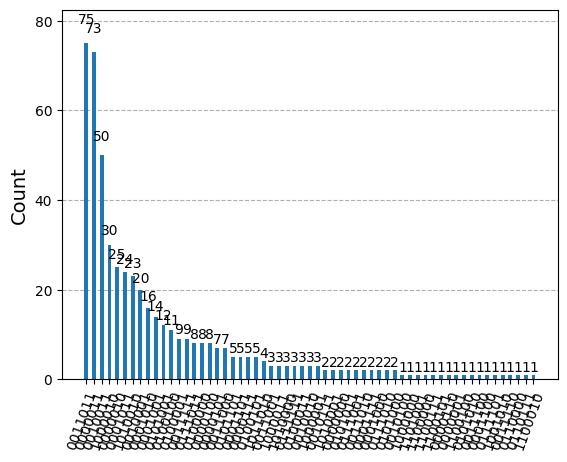

In [16]:
qc_res = create_qaoa_circ_mis(graph, res.x)
counts = AerSimulator().run(qc_res, seed_simulator=10, shots=512).result().get_counts()
plot_histogram(counts, sort='value_desc')

In [17]:
for sol in sorted(counts, key=counts.get, reverse=True):
    vertexes = [idx for idx, item in enumerate(sol) if '1' in item]
    print(f'Vertexes: {vertexes} --- Cost: { mis_obj(sol, graph)}')

Vertexes: [2, 3, 5, 6] --- Cost: -8.0
Vertexes: [5, 6] --- Cost: -4.0
Vertexes: [2, 5, 6] --- Cost: -6.0
Vertexes: [0, 5] --- Cost: -4.0
Vertexes: [5] --- Cost: -2.0
Vertexes: [3, 5, 6] --- Cost: -6.0
Vertexes: [0, 2, 5] --- Cost: -6.0
Vertexes: [2, 6] --- Cost: -4.0
Vertexes: [3, 5] --- Cost: -4.0
Vertexes: [3, 6] --- Cost: -4.0
Vertexes: [1, 3, 6] --- Cost: -6.0
Vertexes: [1, 4] --- Cost: 0.0
Vertexes: [2, 3, 4, 5, 6] --- Cost: -6.0
Vertexes: [1, 6] --- Cost: -4.0
Vertexes: [4] --- Cost: -2.0
Vertexes: [1] --- Cost: -2.0
Vertexes: [1, 2, 3, 5, 6] --- Cost: -2.0
Vertexes: [2, 3] --- Cost: -4.0
Vertexes: [4, 6] --- Cost: -4.0
Vertexes: [1, 4, 6] --- Cost: -2.0
Vertexes: [4, 5, 6] --- Cost: -6.0
Vertexes: [3, 4, 6] --- Cost: -2.0
Vertexes: [1, 3, 4, 6] --- Cost: 0.0
Vertexes: [0, 2, 3, 5] --- Cost: -4.0
Vertexes: [0, 6] --- Cost: 0.0
Vertexes: [2, 5] --- Cost: -4.0
Vertexes: [1, 5, 6] --- Cost: -2.0
Vertexes: [1, 2, 3, 4, 5, 6] --- Cost: 4.0
Vertexes: [0, 2] --- Cost: -4.0
Vertexes: [0,

## Exercise 2.5 (optional): QAOA for the MIS problem: experiment!

Experiment by changing:
- initial graph by adding nodes (remember that the number of nodes is equal to the qubit number, if you increase the size too much you could exceed the memory or get the emulation time), changing the connectivity ($p$) and the random seed;
- increase/reduce the number of QAOA layers (as above, remember that if you overdo the classical optimizer could get too slow and/or give wrong results);
- change the minimization settings (optimization method, initial values of the QAOA parameters $[\gamma^0, \beta^0]$). For example try to set $[\gamma^0, \beta^0] = [0...0]$.

What happens?

# Alternative (and faster) method: Qiskit optimization

In order make easier the definition, execution and benchmark of variational algorithms, Qiskit have built specific libraries which offers simple methods to implement them and a variety of well-known problems as well. Combinatorial optimization problems are among them.

### Installing necessary packages
Let's start by installing the necessary qiskit libraries into your environment and import them. Run the cells below to complete these installations.

In [18]:
!pip install qiskit-algorithms
!pip install qiskit-optimization

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.5/310.5 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 643.4/643.4 kB 8.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.6/167.6 kB 13.4 MB/s eta 0:00:00
  Created wheel for docplex: filename=docplex-2.28.240-py3-none-any.whl size=682833 sha256=a46f15a56a0a609c24d51eb993a4b8db3accb2b44dbaf20b7f387bfff5291d3b
  Stored in directory: /root/.cache/pip/wheels/1b/ec/59/cc07dedc67b032a492201f6f26c1f3c9e667ef208c9213ba6d
Successfully built docplex


In [19]:
from qiskit_algorithms import QAOA
# useful additional packages
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

from qiskit.circuit.library import TwoLocal
from qiskit_optimization.applications import Maxcut, Tsp
from qiskit_algorithms import NumPyMinimumEigensolver
from qiskit_algorithms.optimizers import SPSA, COBYLA
from qiskit_algorithms.utils import algorithm_globals
from qiskit.primitives import Sampler
from qiskit_optimization.algorithms import MinimumEigenOptimizer

### Creating a weighted graph
As a first action, randomly generate a weighted graph using networkx. For now, let's stick with the defined parameters (number of nodes, connectivity and weights). Run the following cell which will also print the created graph.

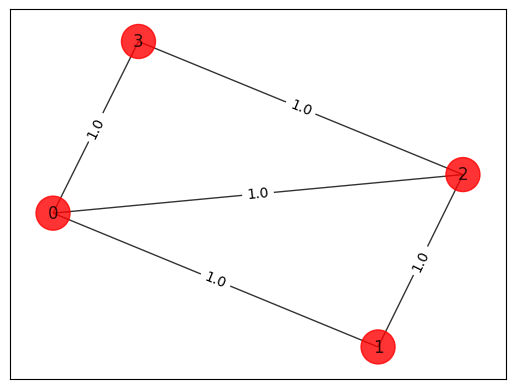

In [20]:
# Generating a graph of 4 nodes

n = 4  # Number of nodes in graph
G = nx.Graph()
G.add_nodes_from(np.arange(0, n, 1))
elist = [(0, 1, 1.0), (0, 2, 1.0), (0, 3, 1.0), (1, 2, 1.0), (2, 3, 1.0)]
# tuple is (i,j,weight) where (i,j) is the edge
G.add_weighted_edges_from(elist)

colors = ["r" for node in G.nodes()]
pos = nx.spring_layout(G)


def draw_graph(G, colors, pos):
    default_axes = plt.axes(frameon=True)
    nx.draw_networkx(G, node_color=colors, node_size=600, alpha=0.8, ax=default_axes, pos=pos)
    edge_labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)


draw_graph(G, colors, pos)

In [21]:
# Computing the weight matrix from the random graph
w = np.zeros([n, n])
for i in range(n):
    for j in range(n):
        temp = G.get_edge_data(i, j, default=0)
        if temp != 0:
            w[i, j] = temp["weight"]
print(w)

[[0. 1. 1. 1.]
 [1. 0. 1. 0.]
 [1. 1. 0. 1.]
 [1. 0. 1. 0.]]


### Brute force approach

Try all possible $2^n$ combinations. For $n = 4$, as in this example, one deals with only 16 combinations, but for n = 1000, one has 1.071509e+30 combinations, which is impractical to deal with by using a brute force approach.

case = [0, 0, 0, 0] cost = 0.0
case = [1, 0, 0, 0] cost = 3.0
case = [0, 1, 0, 0] cost = 2.0
case = [1, 1, 0, 0] cost = 3.0
case = [0, 0, 1, 0] cost = 3.0
case = [1, 0, 1, 0] cost = 4.0
case = [0, 1, 1, 0] cost = 3.0
case = [1, 1, 1, 0] cost = 2.0
case = [0, 0, 0, 1] cost = 2.0
case = [1, 0, 0, 1] cost = 3.0
case = [0, 1, 0, 1] cost = 4.0
case = [1, 1, 0, 1] cost = 3.0
case = [0, 0, 1, 1] cost = 3.0
case = [1, 0, 1, 1] cost = 2.0
case = [0, 1, 1, 1] cost = 3.0
case = [1, 1, 1, 1] cost = 0.0

Best solution = [1, 0, 1, 0] cost = 4.0


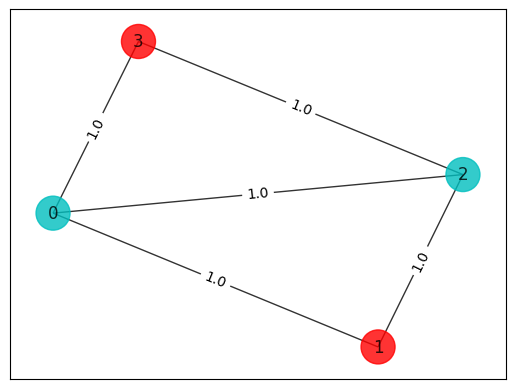

In [22]:
best_cost_brute = 0
for b in range(2**n):
    x = [int(t) for t in reversed(list(bin(b)[2:].zfill(n)))]
    cost = 0
    for i in range(n):
        for j in range(n):
            cost = cost + w[i, j] * x[i] * (1 - x[j])
    if best_cost_brute < cost:
        best_cost_brute = cost
        xbest_brute = x
    print("case = " + str(x) + " cost = " + str(cost))

colors = ["r" if xbest_brute[i] == 0 else "c" for i in range(n)]
draw_graph(G, colors, pos)
print("\nBest solution = " + str(xbest_brute) + " cost = " + str(best_cost_brute))

### Mapping to the Ising problem
Qiskit optimization provides functionality to generate `QuadraticProgram` from the problem specification as well as create the corresponding Ising Hamiltonian.

In [23]:
max_cut = Maxcut(w)
qp = max_cut.to_quadratic_program()
print(qp.prettyprint())

Problem name: Max-cut

Maximize
  -2*x_0*x_1 - 2*x_0*x_2 - 2*x_0*x_3 - 2*x_1*x_2 - 2*x_2*x_3 + 3*x_0 + 2*x_1
  + 3*x_2 + 2*x_3

Subject to
  No constraints

  Binary variables (4)
    x_0 x_1 x_2 x_3



In [24]:
qubitOp, offset = qp.to_ising()
print("Offset:", offset)
print("Ising Hamiltonian:")
print(str(qubitOp))

Offset: -2.5
Ising Hamiltonian:
SparsePauliOp(['IIZZ', 'IZIZ', 'ZIIZ', 'IZZI', 'ZZII'],
              coeffs=[0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j])


Since the problem was cast to a minimization problem, the solution of $-4$ corresponds to the optimum.

### Checking that the full Hamiltonian gives the right cost

energy: -1.5
max-cut objective: -4.0
solution: [1. 0. 1. 0.]
solution objective: 4.0


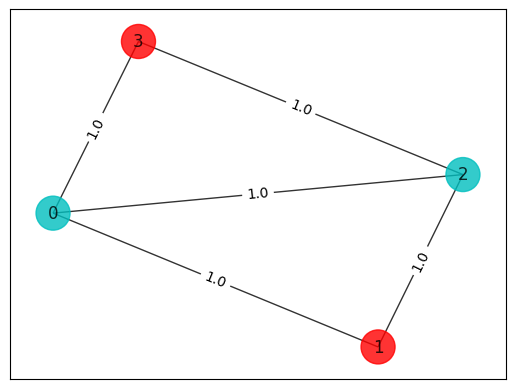

In [25]:
# Making the Hamiltonian in its full form and getting the lowest eigenvalue and eigenvector
ee = NumPyMinimumEigensolver()
result = ee.compute_minimum_eigenvalue(qubitOp)

x = max_cut.sample_most_likely(result.eigenstate)
print("energy:", result.eigenvalue.real)
print("max-cut objective:", result.eigenvalue.real + offset)
print("solution:", x)
print("solution objective:", qp.objective.evaluate(x))

colors = ["r" if x[i] == 0 else "c" for i in range(n)]
draw_graph(G, colors, pos)

### Running it on quantum computer
We run the optimization routine using a feedback loop with a quantum computer that uses trial functions built with Y single-qubit rotations, $U_\mathrm{single}(\theta) = \prod_{i=1}^n Y(\theta_{i})$, and entangler steps $U_\mathrm{entangler}$.

In [26]:
algorithm_globals.random_seed = 123

<ipython-input-27-4307a5ad77cc>:5: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  vqe = SamplingVQE(sampler=Sampler(), ansatz=ry, optimizer=optimizer)


energy: -1.4996861455587294
time: 8.166254997253418
max-cut objective: -3.999686145558729
solution: [0 1 0 1]
solution objective: 4.0


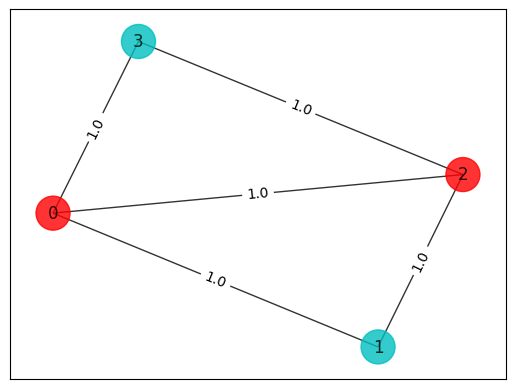

In [27]:
# construct SamplingVQE
from qiskit_algorithms import SamplingVQE
optimizer = SPSA(maxiter=300)
ry = TwoLocal(qubitOp.num_qubits, "ry", "cz", reps=5, entanglement="linear")
vqe = SamplingVQE(sampler=Sampler(), ansatz=ry, optimizer=optimizer)

# run SamplingVQE
result = vqe.compute_minimum_eigenvalue(qubitOp)

# print results
x = max_cut.sample_most_likely(result.eigenstate)
print("energy:", result.eigenvalue.real)
print("time:", result.optimizer_time)
print("max-cut objective:", result.eigenvalue.real + offset)
print("solution:", x)
print("solution objective:", qp.objective.evaluate(x))

# plot results
colors = ["r" if x[i] == 0 else "c" for i in range(n)]
draw_graph(G, colors, pos)

objective function value: 4.0
variable values: x_0=1.0, x_1=0.0, x_2=1.0, x_3=0.0
status: SUCCESS


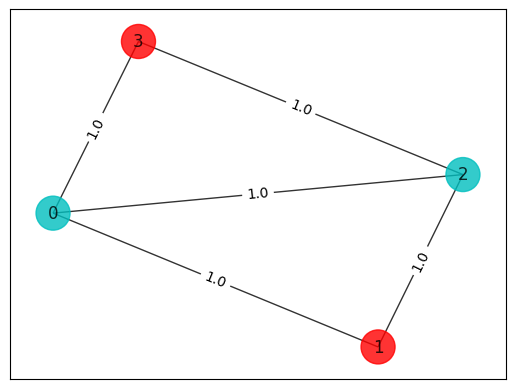

In [28]:
# create minimum eigen optimizer based on SamplingVQE
vqe_optimizer = MinimumEigenOptimizer(vqe)

# solve quadratic program
result = vqe_optimizer.solve(qp)
print(result.prettyprint())

colors = ["r" if result.x[i] == 0 else "c" for i in range(n)]
draw_graph(G, colors, pos)

# Exercise 3: Qiskit algorithms and optimization libraries

Let's practice with these qiskit libraries!

## Exercise 3.1: Qiskit algorithms and optimization libraries: QAOA

Try to solve the same problem using the [QAOA class](https://docs.quantum.ibm.com/api/qiskit/0.28/qiskit.algorithms.QAOA) as the solver using $\underline{one}$ QAOA layer and the $\textit{COBYLA}$ optimizer. For the moment do not initialize the QAOA parameters (automatically set to default values)

<ipython-input-29-6fc770128d08>:3: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  meo = MinimumEigenOptimizer(min_eigen_solver=QAOA(reps=1, sampler=Sampler(), optimizer=COBYLA()))


objective function value: 4.0
variable values: x_0=1.0, x_1=0.0, x_2=1.0, x_3=0.0
status: SUCCESS

solution: [[1, 3], [0, 2]]

time: 0.874786376953125


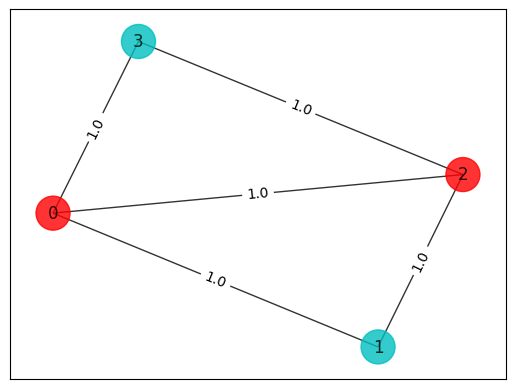

In [29]:
# QAOA
# the number of layers is defined in the reps parameter of the QAOA class
meo = MinimumEigenOptimizer(min_eigen_solver=QAOA(reps=1, sampler=Sampler(), optimizer=COBYLA()))
result = meo.solve(qp)
print(result.prettyprint())
print("\nsolution:", max_cut.interpret(result))
print("\ntime:", result.min_eigen_solver_result.optimizer_time)
# plot results
colors = ["r" if x[i] == 0 else "c" for i in range(n)]
draw_graph(G, colors, pos)

## Exercise 3.2: Qiskit algorithms and optimization libraries: experiment!

Experiment by changing:
- initial graph by adding nodes (remember that the number of nodes is equal to the qubit number, if you increase the size too much you could exceed the memory or get the emulation time), changing the connectivity, weights, etc;
- increase the number of QAOA layers ($\textit{reps}$ parameter). As above, remember that if you overdo the classical optimizer could get too slow and/or give wrong results;
- change the minimization settings (optimization method, initial values of the QAOA parameters $[\gamma, \beta]$).
- the problem: find qiskit's implementations for a variety of optimization problems and applications [here](https://qiskit-community.github.io/qiskit-optimization/apidocs/qiskit_optimization.applications.html)